
ans = 

  Patch with properties:

    FaceColor: [0.5000 0.9000 0.4500]
    FaceAlpha: 1
    EdgeColor: [0 0 0]
    LineStyle: '-'
        Faces: [60x3 double]
     Vertices: [40x3 double]

  Use GET to show all properties

 - Min quality 0.82
 - Mean quality 0.95
 - Uniformity 2.6%
 



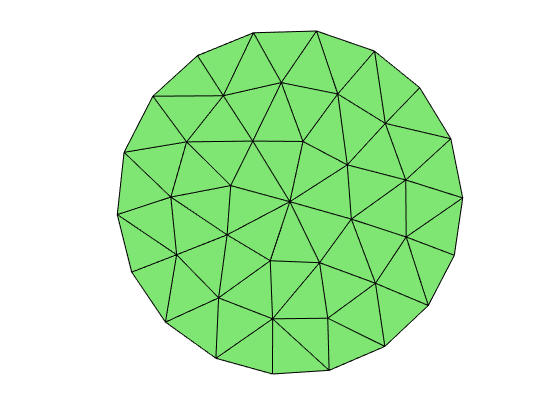

In [14]:
fd=@(p) sqrt(sum(p.^2,2))-1;
[p,t]=distmesh2d(fd,@huniform,0.25,[-1,-1;1,1],[]);
b=unique(boundedges(p,t));


ans = 

  Patch with properties:

    FaceColor: [0.5000 0.9000 0.4500]
    FaceAlpha: 1
    EdgeColor: [0 0 0]
    LineStyle: '-'
        Faces: [60x3 double]
     Vertices: [40x3 double]

  Use GET to show all properties

 - Min quality 0.82
 - Mean quality 0.95
 - Uniformity 2.6%
 



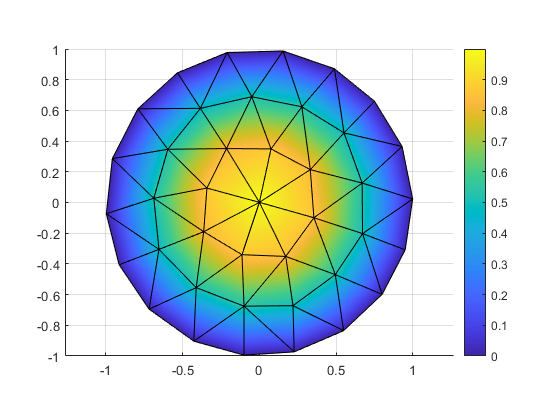

In [2]:
% femcode2.m

% [p,t,b] from distmesh tool
% make sure your matlab path includes the directory where distmesh is installed.

fd=@(p) sqrt(sum(p.^2,2))-1;
[p,t]=distmesh2d(fd,@huniform,0.25,[-1,-1;1,1],[]);
b=unique(boundedges(p,t));

% [K,F] = assemble(p,t) % K and F for any mesh of triangles: linear phi's
N=size(p,1);T=size(t,1); % number of nodes, number of triangles
% p lists x,y coordinates of N nodes, t lists triangles by 3 node numbers
K=sparse(N,N); % zero matrix in sparse format: zeros(N) would be "dense"
F=zeros(N,1); % load vector F to hold integrals of phi's times load f(x,y)

for e=1:T  % integration over one triangular element at a time
  nodes=t(e,:); % row of t = node numbers of the 3 corners of triangle e
  Pe=[ones(3,1),p(nodes,:)]; % 3 by 3 matrix with rows=[1 xcorner ycorner]
  Area=abs(det(Pe))/2; % area of triangle e = half of parallelogram area
  C=inv(Pe); % columns of C are coeffs in a+bx+cy to give phi=1,0,0 at nodes
  % now compute 3 by 3 Ke and 3 by 1 Fe for element e
  grad=C(2:3,:);Ke=Area*grad'*grad; % element matrix from slopes b,c in grad
  Fe=Area/3*4; % integral of phi over triangle is volume of pyramid: f(x,y)=4
  % multiply Fe by f at centroid for load f(x,y): one-point quadrature!
  % centroid would be mean(p(nodes,:)) = average of 3 node coordinates
  K(nodes,nodes)=K(nodes,nodes)+Ke; % add Ke to 9 entries of global K
  F(nodes)=F(nodes)+Fe; % add Fe to 3 components of load vector F
end   % all T element matrices and vectors now assembled into K and F

% [Kb,Fb] = dirichlet(K,F,b) % assembled K was singular! K*ones(N,1)=0
% Implement Dirichlet boundary conditions U(b)=0 at nodes in list b
K(b,:)=0; K(:,b)=0; F(b)=0; % put zeros in boundary rows/columns of K and F
K(b,b)=speye(length(b),length(b)); % put I into boundary submatrix of K
Kb=K; Fb=F; % Stiffness matrix Kb (sparse format) and load vector Fb

% Solving for the vector U will produce U(b)=0 at boundary nodes
U=Kb\Fb;  % The FEM approximation is U_1 phi_1 + ... + U_N phi_N

% Plot the FEM approximation U(x,y) with values U_1 to U_N at the nodes
trisurf(t,p(:,1),p(:,2),0*p(:,1),U,'edgecolor','k','facecolor','interp');
view(2),axis([-1 1 -1 1]),axis equal,colorbar

u = 1 - p(:,1).^2 - p(:,2).^2;
trisurf(t,p(:,1),p(:,2),0*p(:,1),u,'edgecolor','k','facecolor','interp');
view(2),axis([-1 1 -1 1]),axis equal,colorbar

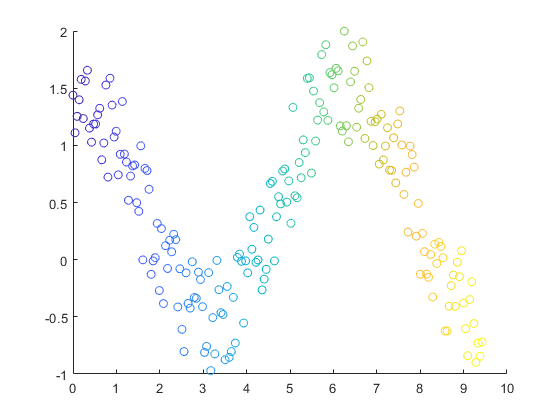

In [13]:
x = linspace(0,3*pi,200);
y = cos(x) + rand(1,200);
c = linspace(1,10,length(x));
scatter(x,y,[],c)

In [ ]:
x = linspace(0,3*pi,200);
y = cos(x) + rand(1,200);
c = linspace(1,10,length(x));
scatter(x,y,[],c)

In [2]:
ifem introduction